#### problem definition
- predict if a patient will suffer with hearing test

##### pre-requisites

In [1]:
import warnings
warnings.filterwarnings(action="ignore")


# install catboost
# %pip install catboost

# install xgboost
# %pip install xgboost

#### import required packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load the data
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


#### EDA

In [6]:
# gives general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
# check null values and return the sum of these values
df.isna().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

### pre-processing

In [7]:
# split data into x and y
x = df.drop('test_result', axis=1)
y = df['test_result']

In [8]:
# split the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

#### train the models

###### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

def create_model_logistic_regression():
    model = LogisticRegression(max_iter=1000)
    model.fit(x_train, y_train)
    return model

#### Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

def create_model_nb():
    model = GaussianNB()
    model.fit(x_train, y_train)
    return model

###### KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

def create_model_knn():
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    return model

###### SVM

In [12]:
from sklearn.svm import SVC

def create_model_svm():
    model = SVC()
    model.fit(x_train, y_train)
    return model

###### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

def create_model_decision_tree():
    model = DecisionTreeClassifier(max_depth=50)
    model.fit(x_train, y_train)
    return model 

###### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

def create_model_random_forest():
    model = RandomForestClassifier(n_estimators=100)
    model.fit(x_train, y_train)
    return model

###### CAT Boost

In [15]:
from catboost import CatBoostClassifier

def create_model_catboost():
    model = CatBoostClassifier(logging_level='Silent')
    model.fit(x_train, y_train)
    return model

###### AdaBoost

In [16]:
from sklearn.ensemble import AdaBoostClassifier

def create_model_ada_boost():
    model = AdaBoostClassifier()
    model.fit(x_train, y_train)
    return model

###### GradientBoost

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

def create_model_grandient_boost():
    model = GradientBoostingClassifier()
    model.fit(x_train, y_train)
    return model

###### XGBoost

In [19]:
from xgboost import XGBClassifier

def create_model_xgboost():
    model = XGBClassifier()
    model.fit(x_train, y_train)
    return model

#### model evaluation

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model):
    # training accuracry
    y_pred = model.predict(x_train)
    y_true = y_train

    # calculate training accuracy
    training_accuracy = accuracy_score(y_true, y_pred)

    # testing accuracy
    y_pred = model.predict(x_test)
    y_true = y_test

    # get the performance metrics for testing
    testing_accuracy = accuracy_score(y_true, y_pred)
    testing_precision = precision_score(y_true, y_pred)
    testing_recall = recall_score(y_true, y_pred)
    testing_f1 = f1_score(y_true, y_pred)
    testing_roc = roc_auc_score(y_true, y_pred)

    return training_accuracy, testing_accuracy, testing_precision, testing_recall, testing_f1, testing_roc

#### generate performance chart

In [23]:
models = [
    ("Logistic Regression", create_model_logistic_regression(), (0, 0)),
    ("Naive Bayes", create_model_nb(), (0, 1)),
    ("KNN", create_model_knn(), (1, 0)),
    ("SVM", create_model_svm(), (1, 1)),
    ("Decision Tree", create_model_decision_tree(), (2, 0)),
    ("Random Forest", create_model_random_forest(), (2, 1)),
    ("CAT Boost", create_model_catboost(), (3, 0)),
    ("Ada Boost", create_model_ada_boost(), (3, 1)),
    ("Grandient Boost", create_model_grandient_boost(), (4, 0)),
    ("XGBoost", create_model_xgboost(), (4, 1))
]

In [24]:
performance_data = []
for model_name, model, position in models:
    train_accuracy, test_accuracy, precision, recall, f1, roc = evaluate_model(model)
    performance_data.append([
        model_name, f"{train_accuracy * 100:0.2f}%", f"{test_accuracy * 100:0.2f}%", precision, recall, f1, roc
    ])
    
performance_chart = pd.DataFrame(performance_data, 
            columns=["Model", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1", "ROC"])
performance_chart

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1,ROC
0,Logistic Regression,91.74%,91.27%,0.910901,0.949727,0.929909,0.902214
1,Naive Bayes,91.17%,91.53%,0.925486,0.936612,0.931016,0.909332
2,KNN,94.09%,92.27%,0.920969,0.955191,0.937768,0.913493
3,SVM,92.80%,92.40%,0.913313,0.967213,0.939490,0.911812
4,Decision Tree,97.46%,87.80%,0.912162,0.885246,0.898502,0.875956
5,Random Forest,97.46%,90.00%,0.912621,0.924590,0.918567,0.893064
6,CAT Boost,94.49%,92.87%,0.919958,0.967213,0.942994,0.917795
7,Ada Boost,91.94%,91.67%,0.903061,0.967213,0.934037,0.902410
8,Grandient Boost,93.83%,92.67%,0.917098,0.967213,0.941489,0.915230
9,XGBoost,95.31%,91.53%,0.914737,0.949727,0.931903,0.905633


### result visualization

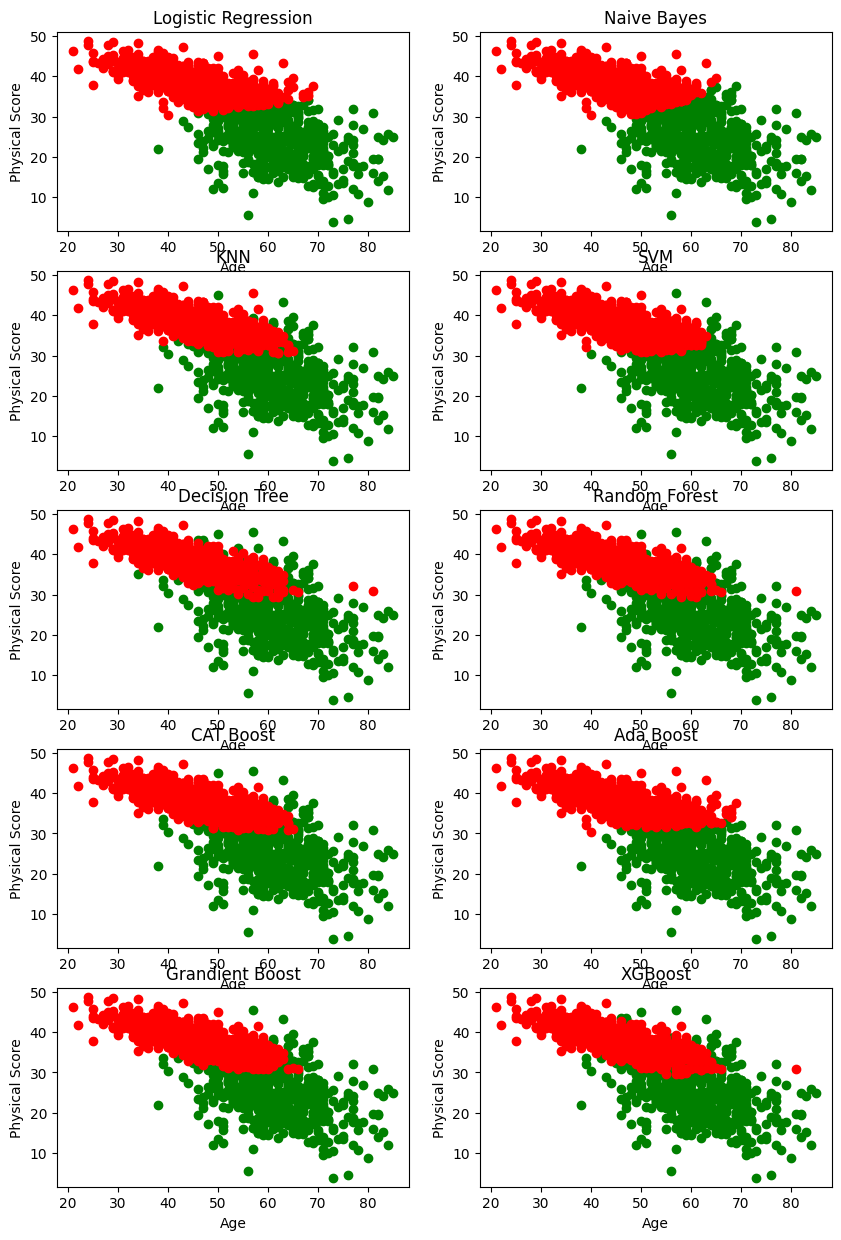

In [30]:
fig, axs = plt.subplots(5, 2, figsize=(10, 15))

for model_name, model, position in models:
    y_pred = model.predict(x_test)
    
    axs[position[0], position[1]].scatter(
        x_test['age'][y_pred==0], x_test['physical_score'][y_pred==0], 
        color="green", label="Wont Suffer"
    )
    axs[position[0], position[1]].scatter(
        x_test['age'][y_pred==1], x_test['physical_score'][y_pred==1], 
        color="red", label="Will Suffer"
    )
    
    axs[position[0], position[1]].set(xlabel="Age", ylabel="Physical Score")
    axs[position[0], position[1]].set_title(model_name)